In [20]:
import pandas as pd
import numpy as np
from sklearn import linear_model #scikit-learn
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# luetaan tiedosto dataframeen
df = pd.read_csv('winequality-red.csv', sep=';')

# poistetaan quality
df = df.drop(columns=['quality'])

# poistetaan duplikaatit
df.drop_duplicates(inplace=True)

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


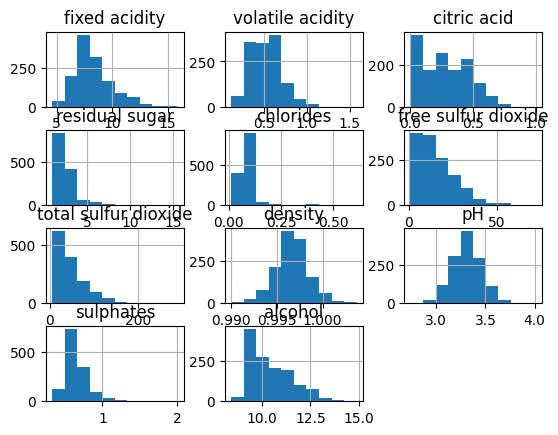

In [23]:
df.hist(bins=10)
plt.show()

In [24]:
X = df.iloc[:,0:10] # selittävät muuttujat
Y = df.iloc[:, -1] # alkoholi on vastemuuttuja
#print(X)
#print(Y)

In [25]:
# jaetaan data testi- ja opetusdataan
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)


(1087, 10)
(272, 10)


# mallinnus

In [26]:
reg = linear_model.LinearRegression()
#sovitetaan arvot malliin
reg.fit(X, Y)

LinearRegression()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
dtypes: float64(11)
memory usage: 127.4 KB


In [28]:
print(reg.feature_names_in_)
print("\ncoefficients / kulmakertoimet", reg.coef_)
print("\nintercepts / vakiotermi", reg.intercept_)


['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates']

coefficients / kulmakertoimet [ 5.44858319e-01  2.87665485e-01  7.16491898e-01  2.91287772e-01
 -1.28533133e+00 -2.09791995e-03 -2.38356177e-03 -6.23083821e+02
  3.79036098e+00  1.26858399e+00]

intercepts / vakiotermi 612.7322805059634


<Axes: >

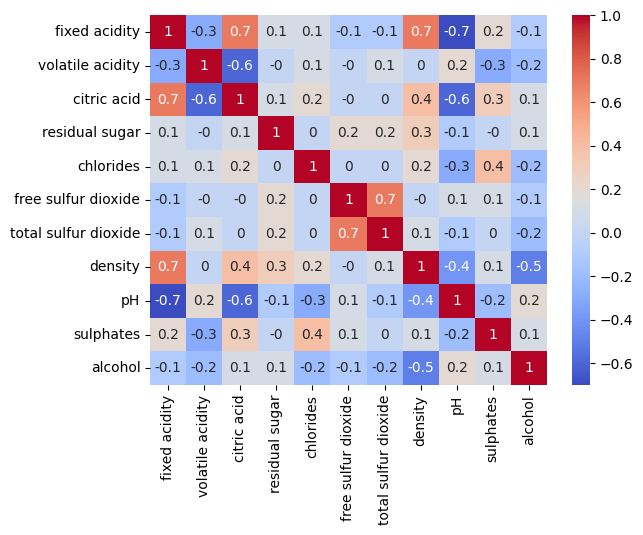

In [42]:
kor = df.corr().round(1)
sns.heatmap(kor, annot=True, cmap='coolwarm')

In [29]:
# testataan mallin luotettavuutta 
y_pred = reg.predict(x_test)
y_pred

array([ 9.59303803, 10.37031715, 11.00519513,  9.33322286, 11.57058783,
       12.3628965 , 10.12317249,  8.74215451, 10.9799054 ,  9.46765527,
       11.6134763 , 10.50935302, 10.50406645, 10.03818875, 11.55359173,
        8.7350199 , 10.36628875,  9.6932998 ,  9.89835534, 10.3467341 ,
        9.74047418, 11.57676911,  9.83347485, 10.08830407,  9.92242827,
        9.85894824, 10.16069967,  9.56397959, 10.16951902, 10.86315616,
       10.77662842, 11.63078403, 10.2188573 , 10.19641945, 10.43942991,
       11.36908961,  9.88030548, 10.96809044, 10.64577428, 10.55978673,
       11.7089274 , 10.18646801, 11.69216348,  9.769689  ,  9.78934478,
       10.20345763,  9.86263044,  9.500521  ,  9.97931522, 10.30317334,
       13.52829728, 11.71409486, 10.87501352,  9.87955727, 11.61116858,
        9.43468738,  9.50875541,  9.7646315 ,  9.39615291,  9.75426795,
        9.96868977, 10.61786354, 10.07326041, 10.86739233, 10.35846382,
       10.30222619,  9.74293313,  8.89269907, 11.21192805, 11.01

In [30]:
# testataan mallin hyvyyttä käyttäen RMSE ja R2

rmse = root_mean_squared_error(y_test, y_pred) # vastemuuttuja ja ennustettu vastemuuttuja
r2 = r2_score(y_test, y_pred)    # selittää kuinka hyvin malli selittää datan varianssia

print("RMSE: ", rmse) # mikä on hyväksyttävä virhe?
print("R2: ", r2) # yksinään ei kerro mitään, tällä vertaillaan malleja toisiinsa 

# RMSE:  0.6303516753263168
# R2:  0.635473861231308



RMSE:  0.5946668086791479
R2:  0.6755780349079439


In [31]:
print(df.shape)


(1359, 11)


In [32]:
df2 = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred), pd.Series(y_test.reset_index(drop=True) - y_pred)], axis=1)
df2.columns = ['Actual', 'Predicted', 'Residual']
df2

,Actual,Predicted,Residual
0,9.5,9.593038,-0.093038
1,10.9,10.370317,0.529683
2,11.2,11.005195,0.194805
3,9.0,9.333223,-0.333223
4,11.2,11.570588,-0.370588
...,...,...,...
267,11.6,11.215937,0.384063
268,9.6,9.431793,0.168207
269,10.5,10.577429,-0.077429
270,12.3,11.625516,0.674484


<Figure size 640x480 with 0 Axes>

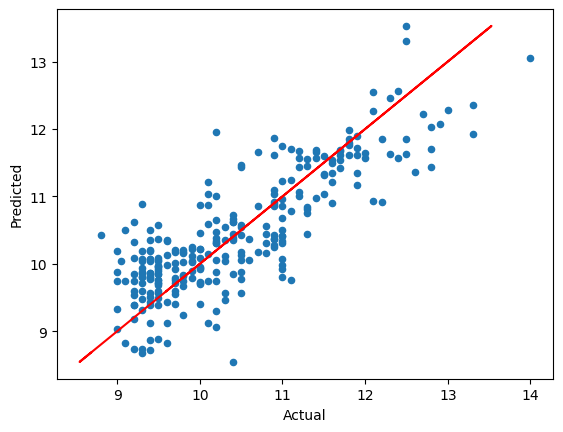

In [33]:
plt.figure()
df2.plot.scatter(x='Actual', y='Predicted')
plt.plot(y_pred, y_pred, color='red')
plt.show()

In [34]:
# standardisointi
scaler = StandardScaler()
dfscaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
dfscaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374


In [43]:
# mallinnus uudestaan

Xscaled = dfscaled.iloc[:, 0:10]
Yscaled = dfscaled.iloc[:, 10]

In [44]:
reg2 = linear_model.LinearRegression()
# sovitetaan
reg2.fit(Xscaled, Yscaled)
print("coefficient / kulmakerroin:", reg2.coef_)
print("intercept / vakiotermi:", reg2.intercept_)
print(reg2.feature_names_in_)

# suurin vaikutus alkoholipitoisuuteen on fixed density (-1,1) ja fixed acidity (0,88)

coefficient / kulmakerroin: [ 0.87463595  0.0486586   0.12947493  0.36403756 -0.0586523  -0.02025528
 -0.07359285 -1.07617522  0.54307582  0.2000852 ]
intercept / vakiotermi: 5.8394080603233e-14
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates']
